Importing the necessary libraries and modules


In [25]:
import os
import sys
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 
sys.path.append(os.path.abspath('../Scripts'))
sys.path.append(os.path.abspath('../src'))
from utils import missing_value_handler
from load_data import load_data_using_sql_alchemy
from data_cleaning import clean_data1
query="SELECT * FROM xdr_data;"
df=load_data_using_sql_alchemy(query)
#df=load_data_from_postgres(query)
if df is not None:
    print("Data is successfully loaded from the PostgreSQL")
else:
    print("An error occured while loading data from sql")
#df.describe()

Data is successfully loaded from the PostgreSQL


In [7]:
df.shape

(150001, 55)

In [22]:
def clean_data(data, column_of_interest, default_column):
    print("Cleaning Data ...")
    data = data.drop_duplicates()
    data = data.dropna(subset=[column_of_interest], how="any")
    data[default_column].fillna(0)
    print("Data Cleaning Task is Completed")
    return data

In [13]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [15]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

C:\Users\Irandufa\AppData\Local\Temp\ipykernel_7208\3029490911.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='missing_percentage', y='column', data=missing_df, palette='viridis')


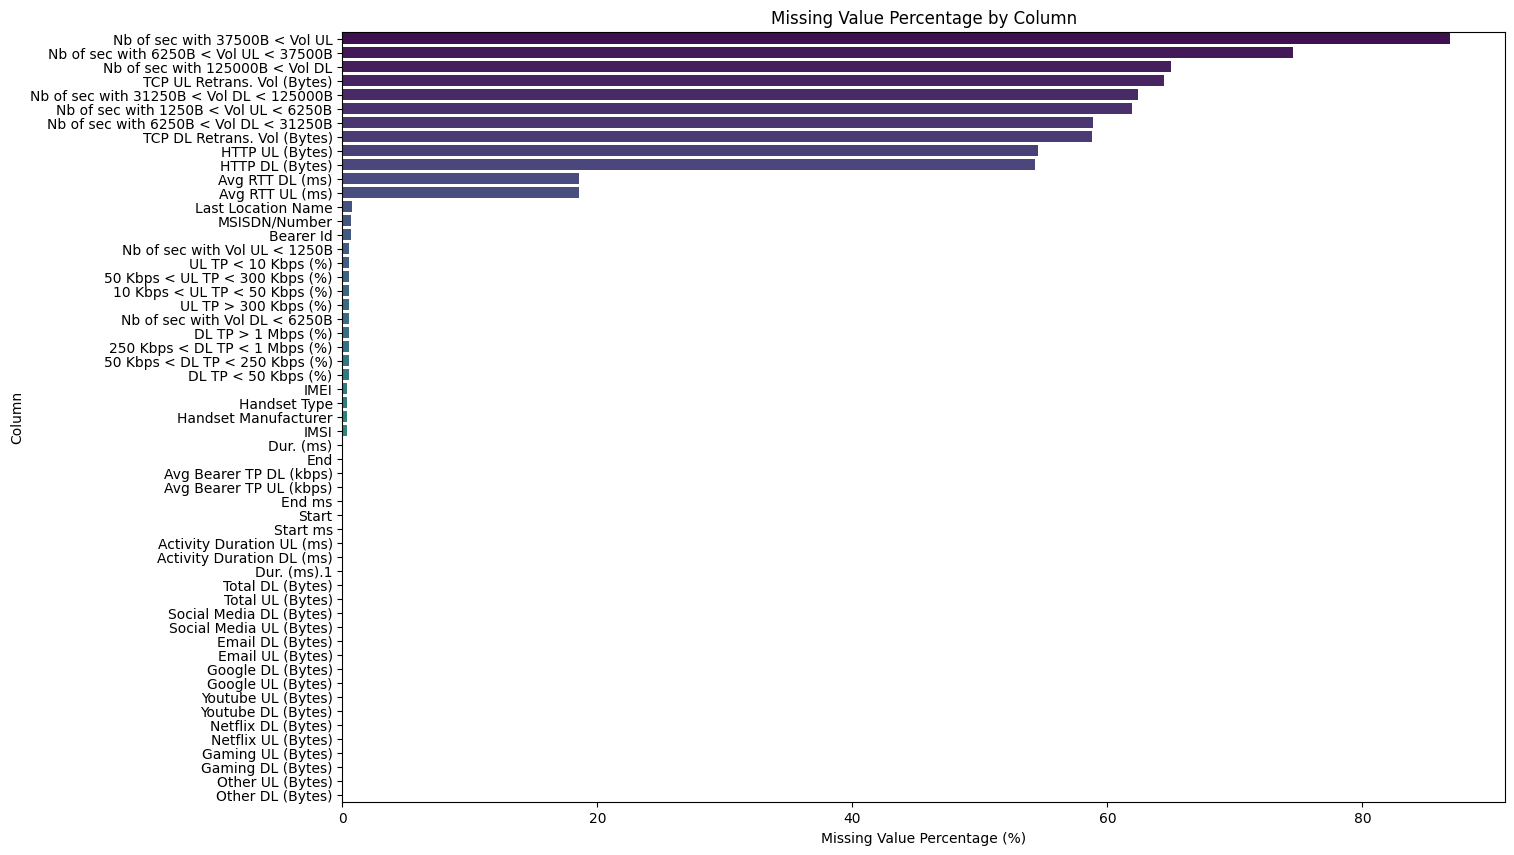

In [27]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100 
missing_df = pd.DataFrame({
    'column': missing_data.index,
    'missing_percentage': missing_percentage
})

# Sort the DataFrame by missing percentage in descending order
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='missing_percentage', y='column', data=missing_df, palette='viridis')
plt.title('Missing Value Percentage by Column')
plt.xlabel('Missing Value Percentage (%)')
plt.ylabel('Column')
plt.show()

In [35]:
column_of_interest = "Start"
default_column = "Avg RTT UL (ms)"
cleaned_dataset = clean_data(df, column_of_interest, default_column)

Cleaning Data ...
Data Cleaning Task is Completed


C:\Users\Irandufa\AppData\Local\Temp\ipykernel_7208\1822921138.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[default_column].fillna(0, inplace=True)


In [36]:
cleaned_dataset.isnull().sum()

Bearer Id                                      990
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                           569
MSISDN/Number                                 1065
IMEI                                           571
Last Location Name                            1152
Avg RTT DL (ms)                              27828
Avg RTT UL (ms)                                  0
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  88145
TCP UL Retrans. Vol (Bytes)                  96648
DL TP < 50 Kbps (%)                            753
50 Kbps < DL TP < 250 Kbps (%)                 753
250 Kbps < DL TP < 1 Mbps (%)                  753
DL TP > 1 Mbps (%)             

Performing the user overview Analysis on our dataset